# 1. Load libraries and data

In [9]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('subset/filtered_subset2.csv.zip', compression='zip')
df.head()

C:\Users\maudd\AppData\Local\Temp\ipykernel_37904\1338788708.py:1: DtypeWarning: Columns (8,10,11,15,17,20,21,27,28,32,33,35,36,45,46,47,50,51,52,53,54,55,62,63,64,65,66,67,74,75,76,77,78,79) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('subset/filtered_subset2.csv.zip', compression='zip')


,BindingDB Reactant_set_id,Ligand SMILES,Ligand InChI,Ligand InChI Key,BindingDB MonomerID,BindingDB Ligand Name,Target Name,Target Source Organism According to Curator or DataSource,Ki (nM),IC50 (nM),...,UniProt (SwissProt) Alternative ID(s) of Target Chain.12,UniProt (TrEMBL) Submitted Name of Target Chain.12,UniProt (TrEMBL) Entry Name of Target Chain.12,UniProt (TrEMBL) Primary ID of Target Chain.12,UniProt (TrEMBL) Secondary ID(s) of Target Chain.12,UniProt (TrEMBL) Alternative ID(s) of Target Chain.12,RDKIT Molecules,Ligand MW,logP,Charge
0,2880,Cn1ncc2c(cccc12)-c1cccn2nc(Nc3ccc4CCN(CCc4c3)C...,"InChI=1S/C29H31N7O2/c1-29(2,3)38-28(37)35-15-1...",MAZKPYXDQCNDAZ-UHFFFAOYSA-N,2013,"US8501936, 298::US8501936, 300",Tyrosine-protein kinase JAK2,Homo sapiens,NaN,16.54,...,NaN,NaN,NaN,NaN,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x00000270973...,509.614,5.3623,0
1,2953,Cn1ncc2c(cccc12)-c1cccn2nc(Nc3ccc4CCN(CCc4c3)C...,"InChI=1S/C29H31N7O2/c1-29(2,3)38-28(37)35-15-1...",MAZKPYXDQCNDAZ-UHFFFAOYSA-N,2013,"US8501936, 298::US8501936, 300",Tyrosine-protein kinase JAK3,Homo sapiens,NaN,226.9,...,NaN,NaN,NaN,NaN,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x00000270973...,509.614,5.3623,0
2,3039,Cn1ncc2c(cccc12)-c1cccn2nc(Nc3ccc4CCN(CCc4c3)C...,"InChI=1S/C29H31N7O2/c1-29(2,3)38-28(37)35-15-1...",MAZKPYXDQCNDAZ-UHFFFAOYSA-N,2013,"US8501936, 298::US8501936, 300",Tyrosine-protein kinase JAK2,Homo sapiens,NaN,16.51,...,NaN,NaN,NaN,NaN,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x00000270973...,509.614,5.3623,0
3,3041,CS(=O)(=O)c1ccc(cc1)C(=C)n1nc(NC(=O)Nc2ccc(cc2...,InChI=1S/C24H27N7O3S/c1-4-22-27-23(29-31(22)17...,IMNDRGLFDWUUKR-UHFFFAOYSA-N,2061,"US8501936, 90",Tyrosine-protein kinase JAK2,Homo sapiens,NaN,9999,...,NaN,NaN,NaN,NaN,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x00000270973...,493.593,2.8972,0
4,3072,CS(=O)(=O)c1ccc(cc1)C(=C)n1nc(NC(=O)Nc2ccc(cc2...,InChI=1S/C24H27N7O3S/c1-4-22-27-23(29-31(22)17...,IMNDRGLFDWUUKR-UHFFFAOYSA-N,2061,"US8501936, 90",Tyrosine-protein kinase JAK3,Homo sapiens,NaN,9999,...,NaN,NaN,NaN,NaN,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x00000270973...,493.593,2.8972,0


# 2. Data exploration

In [23]:
for col in df.columns:
    print(col)

BindingDB Reactant_set_id
Ligand SMILES
Ligand InChI
Ligand InChI Key
BindingDB MonomerID
BindingDB Ligand Name
Target Name
Target Source Organism According to Curator or DataSource
Ki (nM)
IC50 (nM)
Kd (nM)
EC50 (nM)
kon (M-1-s-1)
koff (s-1)
pH
Temp (C)
Curation/DataSource
Article DOI
BindingDB Entry DOI
PMID
PubChem AID
Patent Number
Authors
Institution
Link to Ligand in BindingDB
Link to Target in BindingDB
Link to Ligand-Target Pair in BindingDB
Ligand HET ID in PDB
PDB ID(s) for Ligand-Target Complex
PubChem CID
PubChem SID
ChEBI ID of Ligand
ChEMBL ID of Ligand
DrugBank ID of Ligand
IUPHAR_GRAC ID of Ligand
KEGG ID of Ligand
ZINC ID of Ligand
Number of Protein Chains in Target (>1 implies a multichain complex)
BindingDB Target Chain Sequence
PDB ID(s) of Target Chain
UniProt (SwissProt) Recommended Name of Target Chain
UniProt (SwissProt) Entry Name of Target Chain
UniProt (SwissProt) Primary ID of Target Chain
UniProt (SwissProt) Secondary ID(s) of Target Chain
UniProt (SwissPro

## 2.1 Data cleaning

In [31]:
reaction_metrics.columns[:-4]

Index(['Ki (nM)', 'IC50 (nM)', 'Kd (nM)', 'EC50 (nM)'], dtype='object')

In [33]:
from src.utils.exploration_and_clean import explore_column, quick_check_column, clean_metrics

reaction_metrics = df.iloc[:, 8:16].copy()

for col in reaction_metrics[:, 8:16].columns[:-4] :
    print(col)
    reaction_metrics[col] = clean_metrics(reaction_metrics[col])
    # Check if its only float: 
    for metric in reaction_metrics[col].unique():
        if type(metric) != np.float64 :
            print(col, type(metric))

# But let's see how much data we have for each 
print('Individually we have : ')
for col in reaction_metrics.columns :
    col_no_nan = reaction_metrics[col].dropna()
    print(col, col_no_nan.shape[0])

# let's check the temperature information
nb = reaction_metrics['Temp (C)'].dropna().shape[0]
print('Number of sample with temperature information', nb)

# Need to be clean (remove C and to float)
df['Temp (C)'] = clean_metrics(reaction_metrics['Temp (C)'])

df['Temp (C)'].dropna().hist(log=True)
plt.title('Temperature distribution in logscale')

# Closer look to the physiolocial level
df['Temp (C)'].dropna().hist(log=True, bins=1000)
plt.xlim(15,45)
plt.title('Temperature distribution between (15, 45) °C in logscale')
plt.show()

InvalidIndexError: (slice(None, None, None), slice(8, 16, None))

## 2.2 Univariate analysis

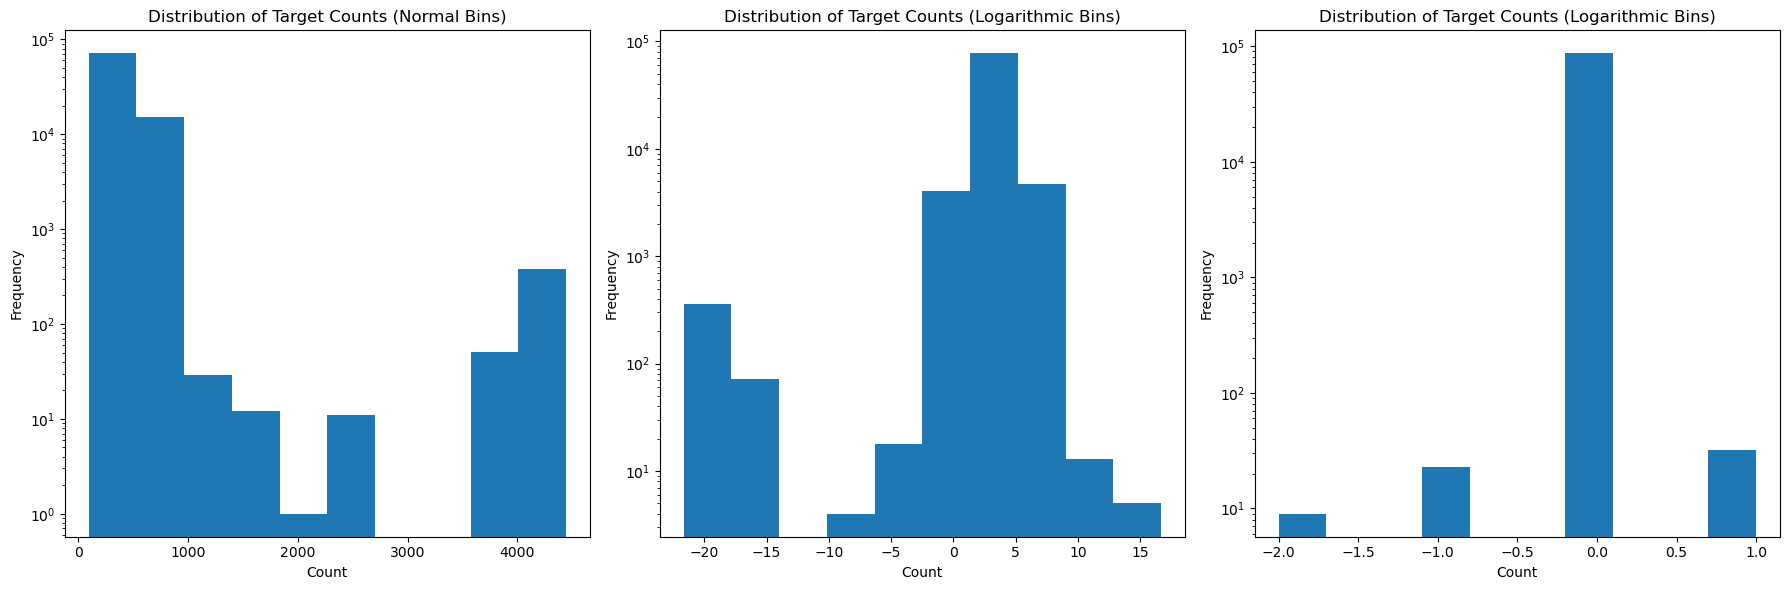

In [ ]:
# Créer une figure avec deux sous-graphiques
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 6))

# Histogram with normal bins
df['Ligand MW'].plot(kind = 'hist', logy=True, ax=axes[0])
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Target Counts (Normal Bins)')

# Histogram with logarithmic bins
df['logP'].plot(kind='hist', logy=True, ax=axes[1])
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Target Counts (Logarithmic Bins)')

# Histogram with logarithmic bins

df['Charge'].plot(kind='hist', logy=True, ax=axes[2])
axes[2].set_xlabel('Count')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Distribution of Target Counts (Logarithmic Bins)')



plt.tight_layout()
plt.show()

TypeError: no numeric data to plot

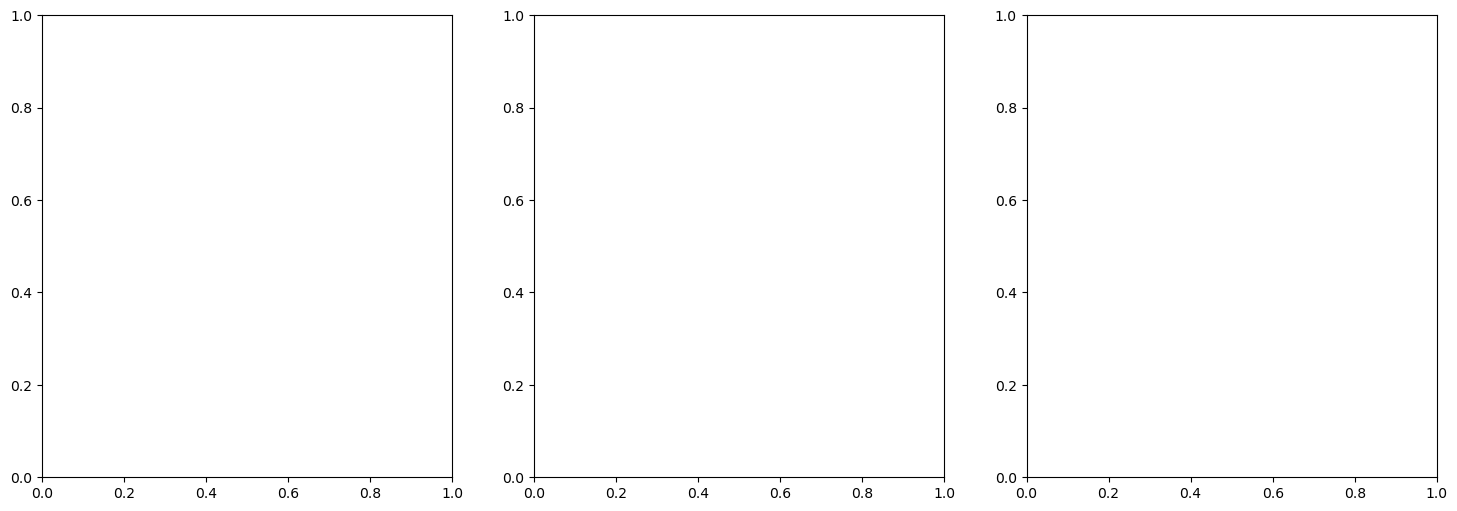

In [25]:
# Créer une figure avec deux sous-graphiques
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Histogram with normal bins
df['Ki (nM)'].plot(kind = 'hist', logy=True, ax=axes[0])
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Target Counts (Normal Bins)')

# Histogram with logarithmic bins
df['IC50 (nM)'].plot(kind='hist', logy=True, ax=axes[1])
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Target Counts (Logarithmic Bins)')

# Histogram with logarithmic bins

df['Kd (nM)'].plot(kind='hist', logy=True, ax=axes[2])
axes[2].set_xlabel('Count')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Distribution of Target Counts (Logarithmic Bins)')



plt.tight_layout()
plt.show()

### 2.2 Weighted by target

In [ ]:
unique_targets, counts = np.unique(df['Target Name'], return_counts=True)

df_targets = pd.DataFrame({
    'Target Name': unique_targets,
    'Count': counts
})

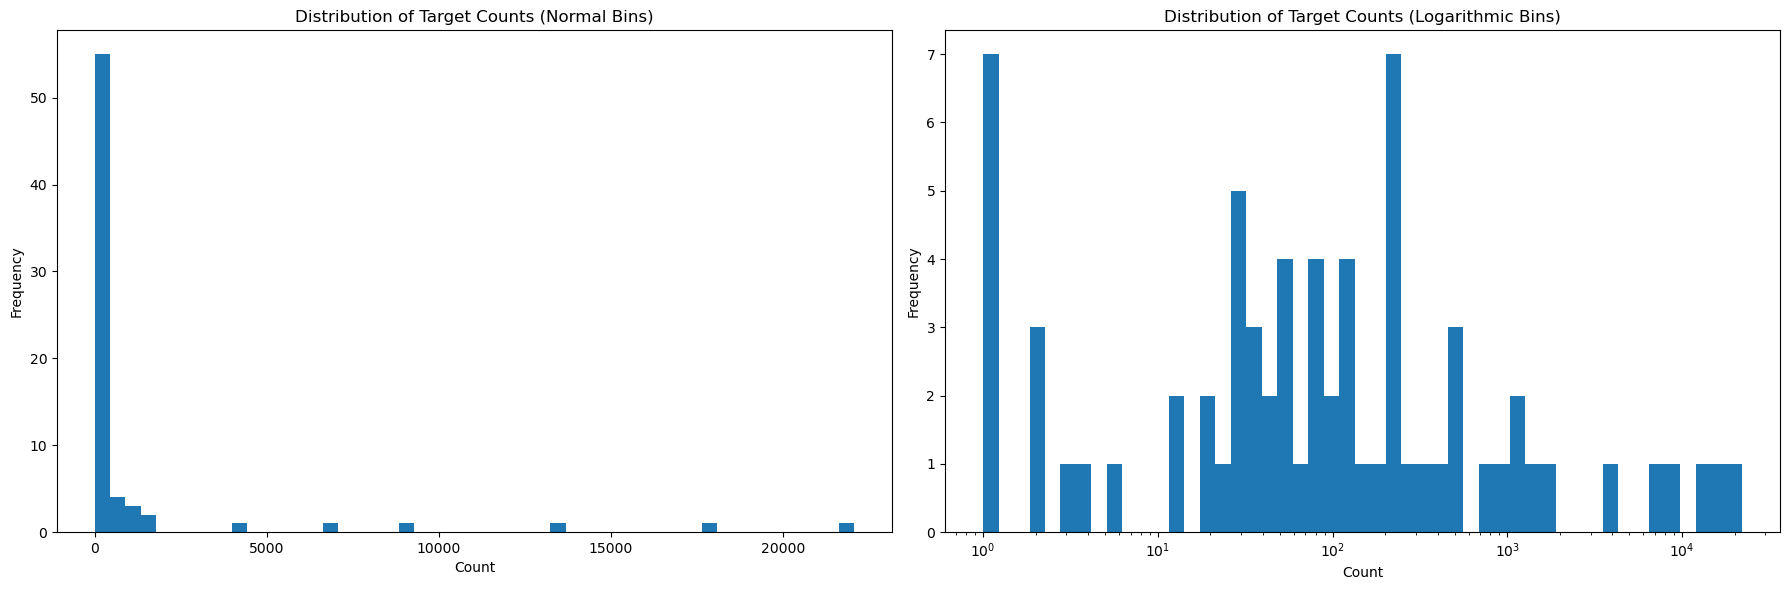

In [15]:
log_bins = np.logspace(np.log10(df_targets['Count'].min()), np.log10(df_targets['Count'].max()), 50)

# Créer une figure avec deux sous-graphiques
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Histogram with normal bins
df_targets['Count'].plot(kind='hist', bins=50, ax=axes[0])
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Target Counts (Normal Bins)')

# Histogram with logarithmic bins
df_targets['Count'].plot(kind='hist', bins=log_bins, ax=axes[1])
axes[1].set_xscale('log')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Target Counts (Logarithmic Bins)')

plt.tight_layout()
plt.show()

## 2.3 Multivariate analysis between features

## 2.4 Features and target variable

In [ ]:
target_variable = 'Ki (nm)'
